In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [4]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [6]:
diabetes = pd.concat([X, y], axis=1)
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


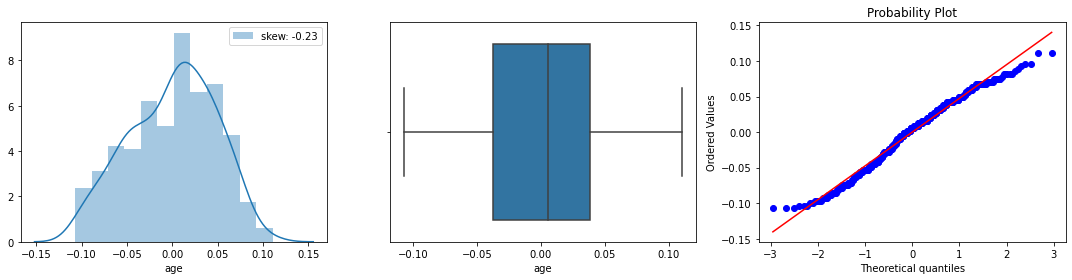

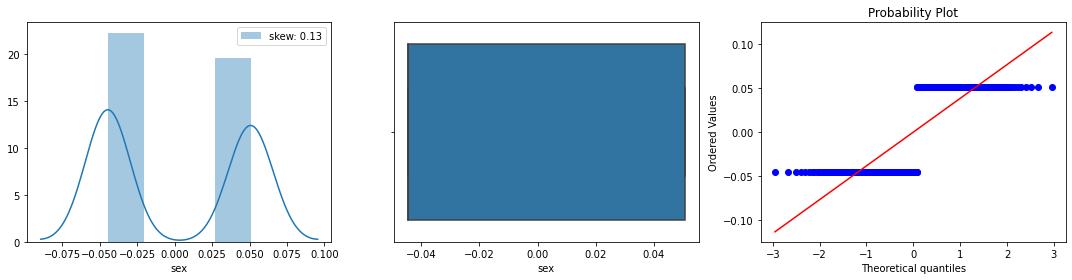

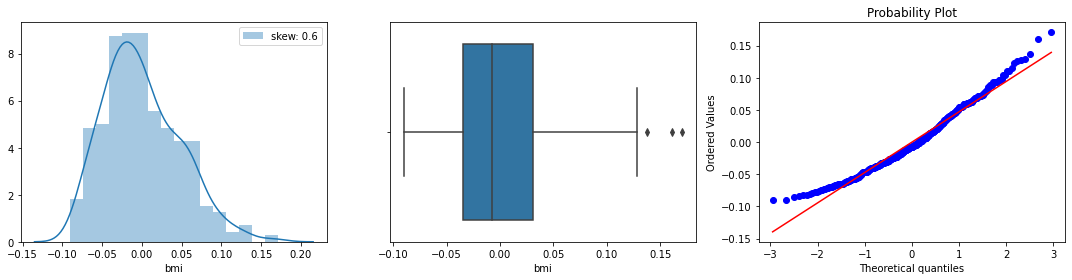

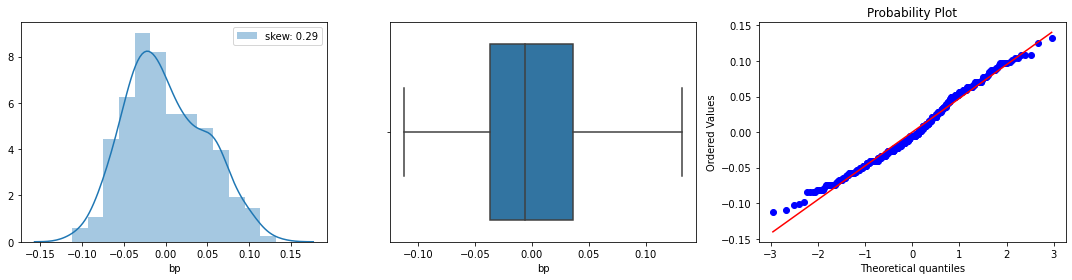

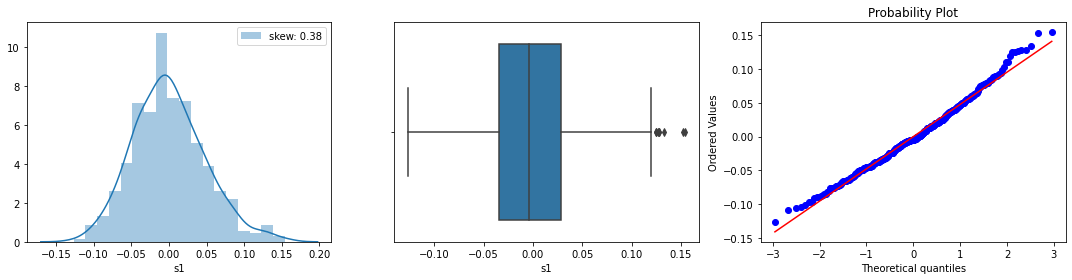

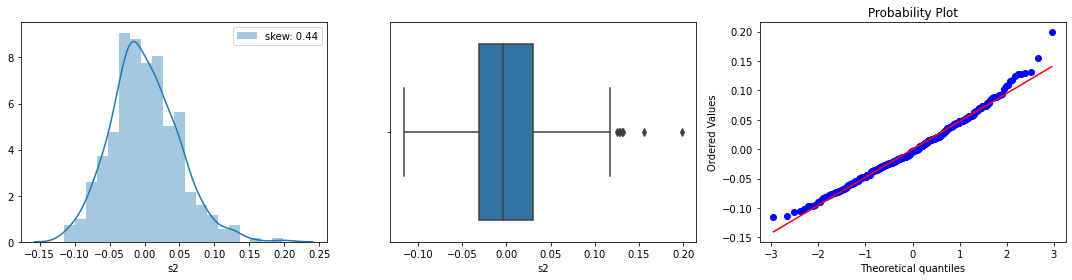

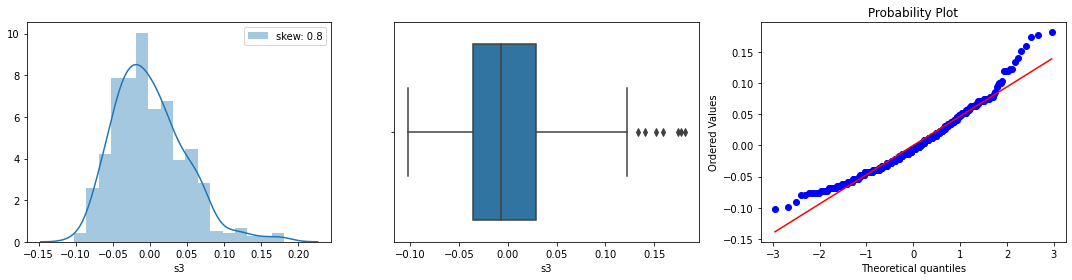

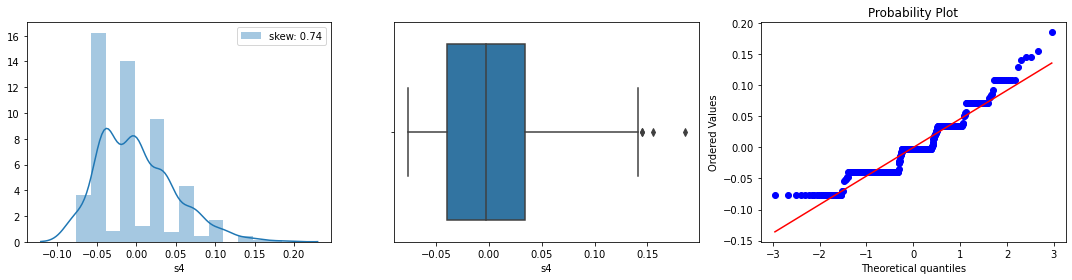

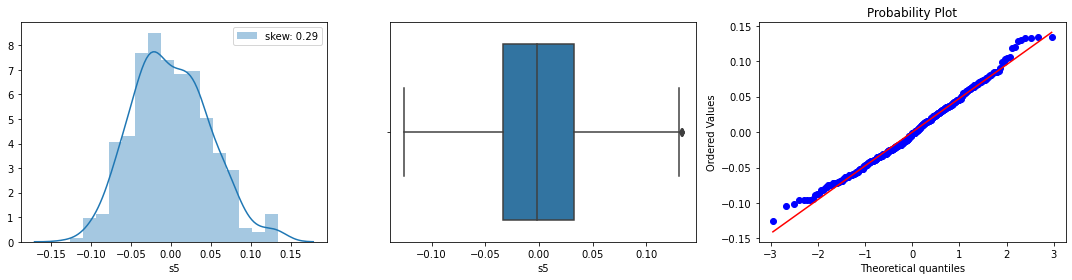

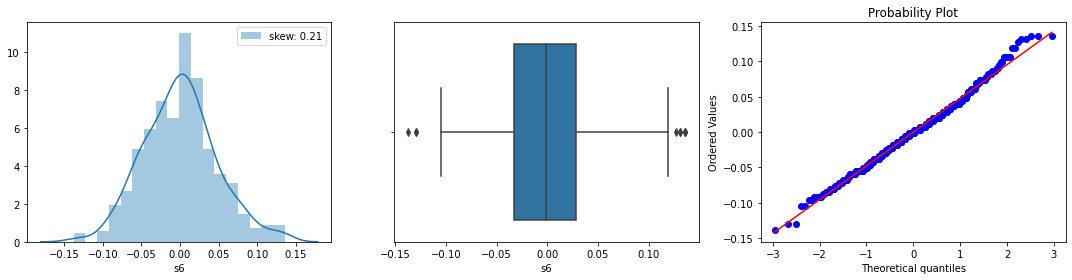

In [7]:
for col in X.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(131)
    sns.distplot(diabetes[col], label="skew: "+str(np.round(diabetes[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(diabetes[col])
    plt.subplot(133)
    stats.probplot(diabetes[col], plot=plt)
    plt.tight_layout()
    plt.show()

### z score capping

In [8]:
df_cap = diabetes.copy()

In [9]:
def zscore_capping(df, cols, thr):
    
    for col in cols:
        
        mean = df[col].mean()
        std = df[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        df[col] = np.where(df[col]>upper_bound, upper_bound, 
                           np.where(df[col]<lower_bound, lower_bound, df[col]))

In [10]:
np.round(diabetes.describe(), 4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


In [11]:
zscore_capping(df_cap, X.columns, 3)

In [12]:
np.round(df_cap.describe(), 4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0001,0.0000,-0.0000,-0.0002,-0.0003,-0.0001,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0473,0.0476,0.0475,0.0471,0.0466,0.0472,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1429,0.1320,0.1429,0.1429,0.1429,0.1429,0.1336,0.1356,346.0000


### z score trimming

In [13]:
df_trim = diabetes.copy()

In [14]:
def zscore_trim(df, cols, thr):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        mean = df[col].mean()
        std = df[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        s = df[col]
        indexes = s[(s>upper_bound) | (s<lower_bound)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers 

In [15]:
zscore_trim(df_trim, X.columns, 3)

array([256., 367., 123., 230., 123., 230.,  58., 260., 261., 269., 441.,
       123., 216., 322., 336.])

In [16]:
dropped = np.unique(zscore_trim(df_trim, X.columns, 3))
dropped

array([ 58., 123., 216., 230., 256., 260., 261., 269., 322., 336., 367.,
       441.])

In [17]:
df_trim.drop(labels = dropped, inplace=True)

In [18]:
diabetes.shape

(442, 11)

In [19]:
df_trim.shape

(430, 11)